# Image operations

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Image-operations" data-toc-modified-id="Image-operations-1">Image operations</a></span><ul class="toc-item"><li><span><a href="#1.0-Import-Libraries" data-toc-modified-id="1.0-Import-Libraries-1.1">1.0 Import Libraries</a></span></li><li><span><a href="#1.1-Read-the-Image" data-toc-modified-id="1.1-Read-the-Image-1.2">1.1 Read the Image</a></span></li><li><span><a href="#1.2-Convert-whole-Image-to-Grayscale" data-toc-modified-id="1.2-Convert-whole-Image-to-Grayscale-1.3">1.2 Convert whole Image to Grayscale</a></span></li><li><span><a href="#1.3-Convert-Range-of-Image-to-another-color" data-toc-modified-id="1.3-Convert-Range-of-Image-to-another-color-1.4">1.3 Convert Range of Image to another color</a></span></li><li><span><a href="#1.4-Images-Geometric-Transformations" data-toc-modified-id="1.4-Images-Geometric-Transformations-1.5">1.4 Images Geometric Transformations</a></span><ul class="toc-item"><li><span><a href="#1.4.1-Image-Scaling" data-toc-modified-id="1.4.1-Image-Scaling-1.5.1">1.4.1 Image Scaling</a></span></li><li><span><a href="#1.4.2-Image-rotation" data-toc-modified-id="1.4.2-Image-rotation-1.5.2">1.4.2 Image rotation</a></span></li></ul></li><li><span><a href="#1.5-Image-Arithmetics" data-toc-modified-id="1.5-Image-Arithmetics-1.6">1.5 Image Arithmetics</a></span><ul class="toc-item"><li><span><a href="#1.5.1-Image-Addition" data-toc-modified-id="1.5.1-Image-Addition-1.6.1">1.5.1 Image Addition</a></span><ul class="toc-item"><li><span><a href="#1.5.1.1-absolute-addition" data-toc-modified-id="1.5.1.1-absolute-addition-1.6.1.1">1.5.1.1 absolute addition</a></span></li><li><span><a href="#1.5.1.2-wieghted-addition" data-toc-modified-id="1.5.1.2-wieghted-addition-1.6.1.2">1.5.1.2 wieghted addition</a></span></li></ul></li><li><span><a href="#1.5.2-Image-Thresholding" data-toc-modified-id="1.5.2-Image-Thresholding-1.6.2">1.5.2 Image Thresholding</a></span></li></ul></li></ul></li></ul></div>

In image manipulations, we can perform operations on colors as well as drowing and adding fonts on them. The dataset we have is grayscaled. I will get a colorful image so that effects of colors will be clear.

## 1.0 Import Libraries

In [1]:
# important imports:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## make sure to install dependencies above.

## 1.1 Read the Image

In [2]:
# reading the image
clrd_img = cv2.imread('colorful_image.jpeg', cv2.IMREAD_COLOR)

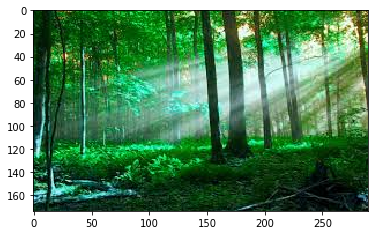

In [3]:
# view the image with plot
plt.imshow(clrd_img)

## 1.2 Convert whole Image to Grayscale

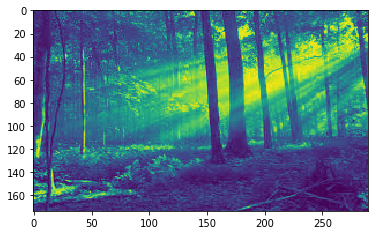

In [4]:
#change the image to grayscale
gray_crld_img = cv2.cvtColor(clrd_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_crld_img)

## 1.3 Convert Range of Image to another color

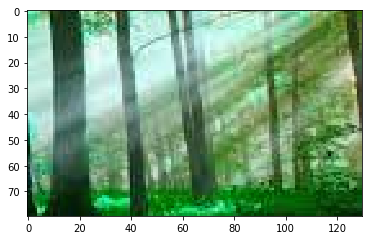

In [5]:
# you can use numpy indecies to take a region of image
# see to above pic, to take a region of it:
#the hieght interval is specified in the first index, 
# and the width interval is specified in the second index
roi = clrd_img[40:120, 160:290]

# you can also choose a specific pixel to change its value as follows:
# px = img[100, 100]
plt.imshow(roi)

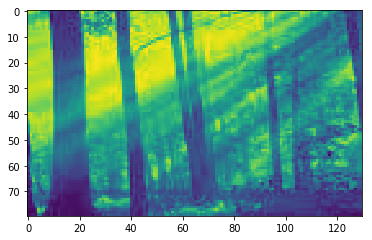

In [6]:
gray_crld_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_crld_roi) 

You can also change this part to any color you like. for example to _red_.


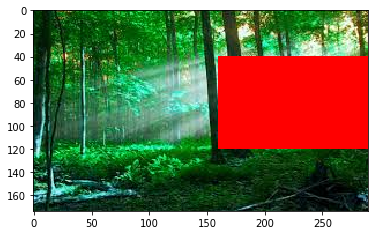

In [7]:
clrd_img_with_red = clrd_img.copy()
clrd_img_with_red[40:120, 160:290] = [255, 0, 0]
plt.imshow(clrd_img_with_red)

you can move parts of image to other locations as well.
look to the following code:

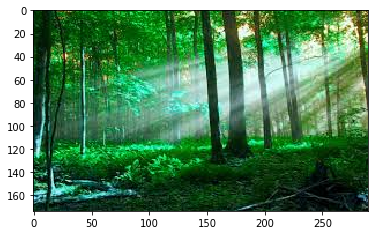

In [8]:
plt.imshow(clrd_img)

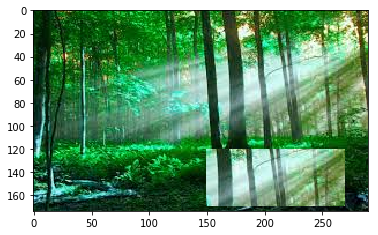

In [9]:
# keep in mind that the size of each region should be identical.
# that is img[a:b, c:d] = img[a':b', c':d'] where:
# |a-b| = |a'-b'| and |c-d| = |c'-d'|
clrd_img_duplicated_parts = clrd_img.copy()
clrd_img_duplicated_parts[120:170, 150:270] = clrd_img[40:90, 160:280]
plt.imshow(clrd_img_duplicated_parts)

## 1.4 Images Geometric Transformations

### 1.4.1 Image Scaling

OpenCV comes with the method cv2.resize() to resizes images. This resizing includes scaling the image up or down as desired.

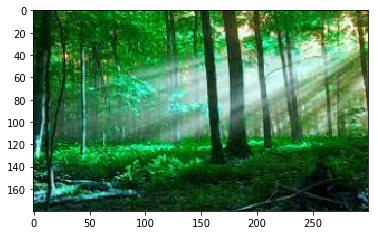

In [10]:
clrd_img_resized = clrd_img.copy()
clrd_img_resized = cv2.resize(clrd_img_resized,(300,180), fx=2, fy=2)
# the first parameter is the image.
# the second paramter is used to define the length of the axis to show
#       if it is the same as the original image, no scaling will be done,
#       if it is (0,0), the image will be shown as default with doubled axis scales
#       you can change the value to see the effect.
# the third parameter is the scaling regarding the x-axis
# the fourth paramter is the scaling regarding the y-axis
plt.imshow(clrd_img_resized)

### 1.4.2 Image rotation

Image rotation is a little bit tricky. To do it, you must first find the rotation matrix then feed it to a function called warpAffine(). These functions are all in the OpenCV

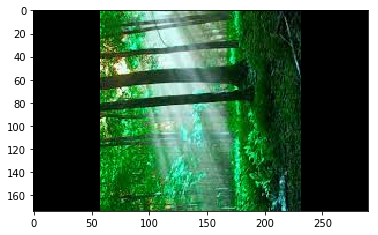

In [11]:
clrd_img_rotated = clrd_img.copy()
rows,cols = clrd_img_rotated.shape[0], clrd_img_rotated.shape[1]

angle = 90
M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
clrd_img_rotated = cv2.warpAffine(clrd_img_rotated, M, (cols, rows))
plt.imshow(clrd_img_rotated)

To be honest, I only get to know how to change the angle, but other parameters are not even clear in the documentation. I may read more about it later.

## 1.5 Image Arithmetics

To understand this part, we need two images. For that porpuse, I am going to have another upload another image. 
**Make sure that both images are of identical size**

In [12]:
clrd_img.shape

(174, 290, 3)

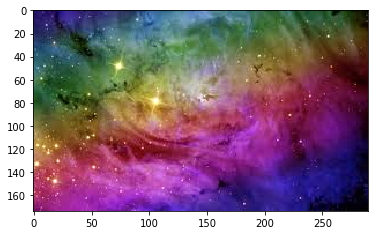

In [13]:
clrd_img2 = cv2.imread('colorful_image2.jpeg')
plt.imshow(clrd_img2)

Moreover, better to have a logo image. I am going to use my university logo :)

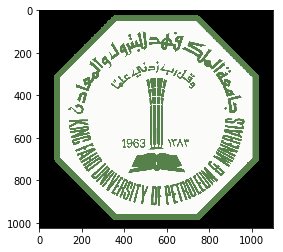

In [14]:
kfupm_logo = cv2.imread('kfupm_logo.png')
plt.imshow(kfupm_logo)

The logo, basically, is without background, you may preview it using opencv to double check. __However, cv2 adds a black background to the image!!__
This is the original image:
[kfupm logo](https://upload.wikimedia.org/wikipedia/commons/6/61/King_Fahd_University_of_Petroleum_%26_Minerals.png)

In [15]:
cv2.imshow('kfupm logo',kfupm_logo)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 1.5.1 Image Addition

#### 1.5.1.1 absolute addition

We can interpret both images using only simple addition of images!! Images are implemented using numpy arrays. Therefore, you can apply this operation just as any two numpy arrays.

what do you think the image will look like??
See the it below:


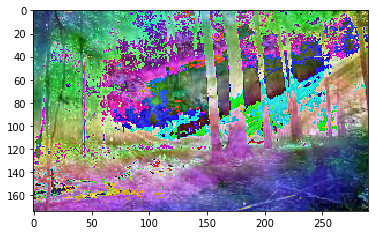

In [16]:
two_images = clrd_img+clrd_img2
plt.imshow(two_images)

**What a bad interpretaion :)) But, What happened??** This image is the result of adding all pexils of both images!! The operation is in mod 256. That is, c = a+b (mod 256) where c is a pexil in the new resuted image a,b are pexils in the images to add.

This resulting image suggests that we shall think of another way if we want to merge two images. It may work sometimes but may give horrible results just as what we get in our case!!

Another version of add is provided with opencv itself. follow the code below:

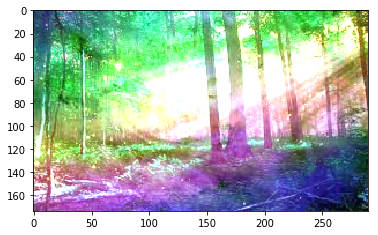

In [17]:
two_images_cv = cv2.add(clrd_img, clrd_img2)
plt.imshow(two_images_cv)

This is a better combination though. Nevertheless, what really happens?? Okay, this image is also the result of adding all pexils of both images!! But if the pexils summatoin is greater than 255, the value of the new pexil is 255.

For example, if a = 255, b = 10, which are pexils in the added images, then pexil c, which is in the resulted image is only 255!!

#### 1.5.1.2 wieghted addition

OpenCV still provides another alternative if the previous solutions did not match developers needs.
This times, you can combine images based on a predetermined weight. The code is below:

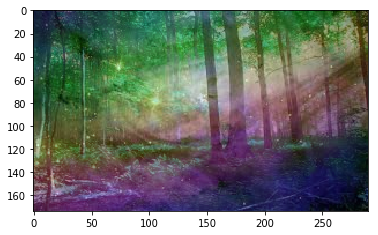

In [18]:
two_images_weighted = cv2.addWeighted(clrd_img, 0.45, clrd_img2, 0.55, 0)
plt.imshow(two_images_weighted)

_As a Conclusion_, there are three ways, up to what I know, to combine images, a developer may choose the best implementation fitting his needs.

### 1.5.2 Image Thresholding

Image Thresholding is a very important operation. It is used, I guess and you will probably agree with me after while, by many commercial applications such as [CamScanner](https://www.camscanner.com/).

The idea is very simple. For a given image, Image thresholding is to change all pixels of the image having value greater that threshold to a given fixed value. The same thing is applied to the pixels below this threshold.

We may apply this on the above colorful images but they will not depict its crucial use. I will apply it on one of them and apply it, then, on another image to show it importance.

**It is important to know that this operation is applied to a gray scaled images** to know why, values of gray scaled images are of type numpy arrays to represent the values of RGB, but pixel values of gray scaled images are just numbers of black intensity between 0,255 inclusive.

In [52]:
clrd_img2_thresholded = clrd_img2.copy()
clrd_img2_thresholded = cv2.cvtColor(clrd_img2_thresholded, cv2.COLOR_BGR2GRAY)
ret, threshold1 = cv2.threshold(clrd_img2_thresholded, 125, 50, cv2.THRESH_BINARY)
# first parameter is the image to be thresholded.
# second paramter is the threshold by which pixels are calssified.
# third parameter is the maxVal to which pixels exceeding the threshold are converted.
# fourth paramter is the threshold type. Better to take a look at their differences in this page: 
# https://docs.opencv.org/2.4/doc/tutorials/imgproc/threshold/threshold.html

original image


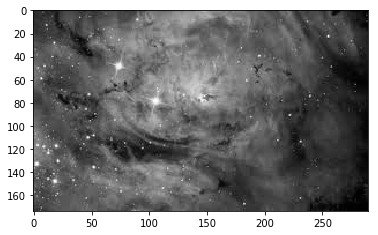

In [46]:
print('original image')
plt.imshow(clrd_img2_thresholded)

thresholded image


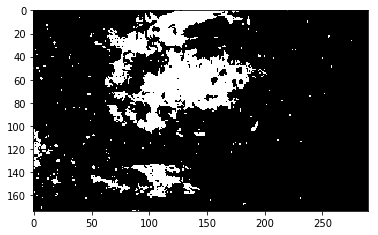

In [50]:
print('thresholded image')
plt.imshow(threshold1, cmap='gray')

Matplotlib Library is not good at showing grayscaled images. Actually, it shows all white scales as only one color. the White color.Better to move to cv2.imshow() in the following code:

In [33]:
cv2.imshow('test',threshold1)
cv2.waitKey(0)
cv2.destroyAllWindows()